In [13]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [14]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


## Portfolio

* They only have 10 promotions.
* The rewards are 0, 2, 3, 5 and 10 USD off?
* To complete an offer you have to spend from 0 up to 20 USD.
* An offer can last 3, 4 ,5 ,7 or 10 days.
* Offers might be dicsounts and bogo or informational

In [15]:
portfolio.shape

(10, 6)

In [16]:

np.sort( portfolio.reward.unique() )


array([ 0,  2,  3,  5, 10])

In [17]:
np.sort( portfolio.difficulty.unique() )

array([ 0,  5,  7, 10, 20])

In [18]:
np.sort( portfolio.duration.unique() )

array([ 3,  4,  5,  7, 10])

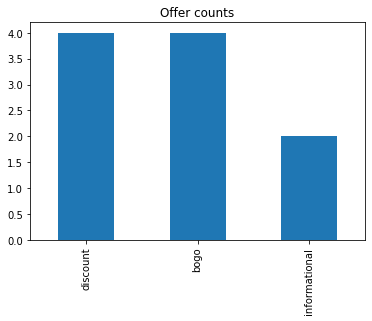

In [19]:
portfolio['offer_type'].value_counts().plot(kind = 'bar', title = 'Offer counts', y = 'Counts');

In [20]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


En género:
- ¿Qué es None y qué es 0?

In [24]:
profile.gender.unique()

array([None, 'F', 'M', 'O'], dtype=object)

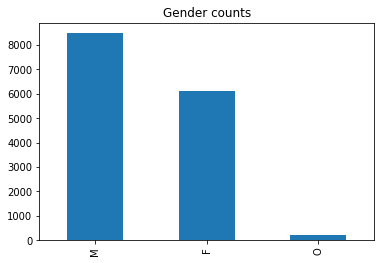

In [25]:
profile['gender'].value_counts().plot(kind = 'bar', title = 'Gender counts', y = 'Counts');

En age:
* tenemos valores muy extremos en la edad
* son mayores de edad
* para limpiar la edad podría crear grupos de edad

In [26]:
np.sort( profile.age.unique() )

array([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 118])

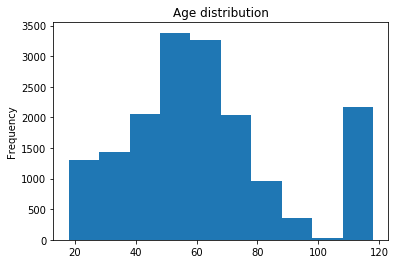

In [27]:
profile['age'].plot(kind = 'hist', bins=10, grid = False, title = "Age distribution");


Became member on:
* La fecha hay que formatearla y parsearla como fecha. YYYYMMDD


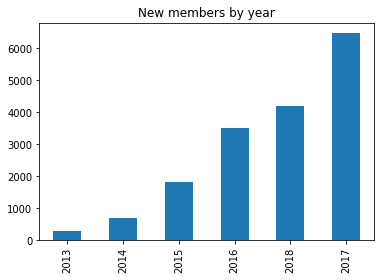

In [28]:
member_year = profile['became_member_on'].astype('str').str.slice( start = 0, stop= 4)
member_month = profile['became_member_on'].astype('str').str.slice( start = 4, stop= 6)
member_day = profile['became_member_on'].astype('str').str.slice( start = 6, stop= 8)
profile['clean_became_member_on'] = pd.to_datetime( member_year + "-" + member_month + "-" + member_day )

member_year.value_counts().sort_values().plot(kind = 'bar', title = "New members by year");

Income:
* Tiene valores nulos
* Supongo que el ingreso está estimado en USD

False    14825
True      2175
Name: income, dtype: int64

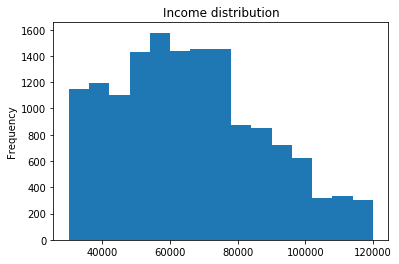

In [29]:
profile['income'].plot(kind = 'hist', bins=15, grid = False, title = "Income distribution");

profile.income.describe()

profile.income.isna().value_counts()

## Transcript

* Join transcript and profile with person and id respectively.
* Join transcript with portfolio with value offer id and id, respectively.
* The column value stores in a dictionary offer_id and amount.

Events:
* Transactions
* Offer received
* Offer viewed
* Offer completed

In [ ]:
transcript.event.value_counts().plot( kind = 'bar', title = "Distribution of events");

Time

In [31]:
print( "Max days since beginning of test: {}".format(700 / 24) )

Max days since beginning of test: 29.166666666666668


Value:
    
* Cuando event es transacción viene el amount de la transacción la oferta.
* Pero la offer completed puede tener offer completed no tiene amount.

In [32]:
transcript.sample(20)

,person,event,value,time
104301,6d8add6a25974650b5f03c781d172314,transaction,{'amount': 2.65},294
182517,26df95a49cbd48f3b18bfbb31d240c7c,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},438
194428,a197ac9c98934b61a842d04b959c0ac2,transaction,{'amount': 9.74},474
18093,9df2790f060d430e94f17189042e5671,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},12
116085,a37cfa5f821440deb5e5771a3bb2a0d7,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},336
166164,a3f32a88c02848d9973a701888877ef8,transaction,{'amount': 8.8},408
11454,0a9b887bdf2d41b592ba69549760f191,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
276719,e44d3bde10b147568f9c11fb0414abf5,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,606
85559,f97c5306c38740bd991165598eafa630,transaction,{'amount': 3.15},216
259547,041967ceb80841ddbd306958d4f744ac,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,576


In [33]:
transcript[ transcript.person == '7f0f4f70ce834918828bd074dfa41e85' ]

,person,event,value,time
6237,7f0f4f70ce834918828bd074dfa41e85,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
59446,7f0f4f70ce834918828bd074dfa41e85,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},168
67608,7f0f4f70ce834918828bd074dfa41e85,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},168
73514,7f0f4f70ce834918828bd074dfa41e85,transaction,{'amount': 4.26},180
88016,7f0f4f70ce834918828bd074dfa41e85,transaction,{'amount': 0.7000000000000001},222
89744,7f0f4f70ce834918828bd074dfa41e85,transaction,{'amount': 10.21},228
89745,7f0f4f70ce834918828bd074dfa41e85,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,228
91354,7f0f4f70ce834918828bd074dfa41e85,transaction,{'amount': 12.09},234
97040,7f0f4f70ce834918828bd074dfa41e85,transaction,{'amount': 1.01},258
102037,7f0f4f70ce834918828bd074dfa41e85,transaction,{'amount': 4.72},282


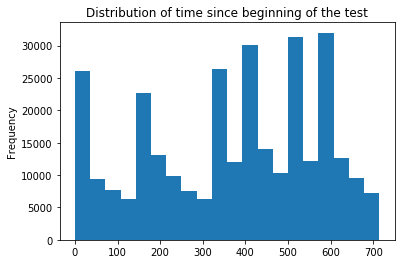

In [34]:
transcript.time.plot(kind = 'hist', bins = 20, title = "Distribution of time since beginning of the test");